In [1]:
import pandas as pd
import numpy as np
import os, json
import matplotlib.pyplot as plt
import torch

In [2]:
def load_reward(path):
    files_name = os.listdir(path)
    files_name.remove('model_parameters.txt')
    models = list(filter(lambda n: "model" in n,  files_name))
    if len(models)==1:
        load_path = os.path.join(path, 'model.pt')
    else: 
        temp = np.array([int(name.replace('model_','').replace('.pt','')) for name in iter(models)])
        load_path = os.path.join(path, 'model_'+str(max(temp))+'.pt')
        
    ckpt = torch.load(load_path)
    
    return ckpt['avg_reward'], ckpt['std_reward'], ckpt['enc_losses']

def time_to_cv(r):
    temp = np.where(r>(-200))[0]
    if len(temp)==0:
        return len(r)
    else: 
        return temp[0]

In [3]:
param = []
r_mean = []
r_std = []
enc_loss = []
for d in filter(lambda x:'Pendulum' in x,os.listdir(os.getcwd())):
    if os.path.exists(os.path.join(d,"model_parameters.txt")):
        with open(os.path.join(d,'model_parameters.txt')) as f:
            param.append(json.loads(f.read()))
        r_mean_, r_std_, enc_loss_ = load_reward(d)
        param[-1]['r_mean'] = np.array(r_mean_)
        param[-1]['r_std'] = np.array(r_std_)
        param[-1]['enc_loss'] = np.array(enc_loss_)
        
data = pd.DataFrame.from_dict(param)
data['name'] = [i.split('/')[-1] for i in data['save_dir']]

In [11]:
pd.set_option('display.max_columns', None)
data

,mode,env,seed,delay,stochastic_delays,max_delay,delay_proba,force_stoch_env,steps_per_epoch,epochs,max_ep_len,gamma,delta,save_period,train_continue,test_episodes,test_steps,epoch_load,v_hid,v_l,vf_lr,v_iters,pi_activation,pi_hid,pi_l,damping_coeff,cg_iters,backtrack_iters,backtrack_coeff,lam,pretrain_epochs,epochs_belief_training,pretrain_steps,train_enc_iters,size_pred_buf,batch_size_pred,enc_lr,maf_lr,enc_dim,enc_heads,enc_l,enc_ff,enc_rescaling,enc_causal,enc_pred_to_pi,only_last_belief,convolutions,lstm,n_layers,hidden_size,n_blocks_maf,hidden_dim,hidden_dim_maf,save_dir,r_mean,r_std,enc_loss,use_belief,stoch_mdp_param,stoch_mdp_distrib,name,max_mean_r,min_enc_loss,cv_speed
0,train,Pendulum,0,5,False,50,0.7,True,5000,1000,250,0.99,0.001,100,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,2,300,10000,1,100000,10000,0.01,0.01,64,2,1,8,False,True,False,False,False,False,3,16,5,4,16,./output/dtrpo/Pendulum-Results/Pendulum-run29,"[-1208.5128296700304, -1181.747691613433, -123...","[313.88580114515736, 289.7628214862086, 329.25...","[4.7381062507629395, 4.67898416519165, 4.58821...",NaN,NaN,NaN,Pendulum-run29,-131.527536,-3.353540,754
1,train,Pendulum,0,5,False,50,0.7,True,5000,1000,250,0.99,0.001,100,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,2,200,10000,1,100000,10000,0.01,0.01,64,2,1,8,False,True,False,False,False,False,3,16,5,4,16,./output/dtrpo/Pendulum-Results/Pendulum-run30,"[-1213.8365517391264, -1142.9042167583038, -11...","[322.6190178397965, 247.7275026762929, 301.584...","[4.738399505615234, 4.674805164337158, 4.61855...",NaN,NaN,NaN,Pendulum-run30,-130.418658,-1.457485,599
2,train,Pendulum-v0,0,5,False,50,0.7,False,5000,1000,250,0.99,0.001,100,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,2,10,10000,1,100000,10000,0.01,0.01,64,2,1,8,False,True,False,False,False,False,3,16,5,4,16,./output/dtrpo/Pendulum-v0-Results/Pendulum-v0...,"[-1639.55752581564, -1453.5511078864076, -1441...","[455.6207451659447, 404.23946735231544, 338.93...","[4.4928297996521, 4.555641174316406, 4.5622549...",True,1.0,Gaussian,Pendulum-v0-20-12-20_22_28_671999,-852.762749,4.318354,1000
3,train,Pendulum-v0,0,5,False,50,0.7,False,5000,1000,250,0.99,0.001,100,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,2,100,10000,1,100000,10000,0.01,0.01,64,2,1,8,False,True,False,False,False,False,3,16,5,4,16,./output/dtrpo/Pendulum-v0-Results/Pendulum-v0...,"[-1639.55752581564, -1453.5511078864076, -1441...","[455.6207451659447, 404.23946735231544, 338.93...","[4.4928297996521, 4.555641174316406, 4.5622549...",True,1.0,Gaussian,Pendulum-v0-20-12-20_22_29_300169,-198.441099,0.956439,957
4,train,Pendulum-v0,0,5,False,50,0.7,False,5000,1000,250,0.99,0.001,100,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,2,250,10000,1,100000,10000,0.01,0.01,64,2,1,8,False,True,False,False,False,False,3,16,5,4,16,./output/dtrpo/Pendulum-v0-Results/Pendulum-v0...,"[-1639.55752581564, -1453.5511929018564, -1441...","[455.6207451659447, 404.2393611197558, 338.930...","[4.4928297996521, 4.555640697479248, 4.5622549...",True,1.0,Gaussian,Pendulum-v0-20-12-22_23_26_870356,-132.737451,-2.062485,487
5,train,Pendulum-v0,0,5,False,50,0.7,False,5000,1000,250,0.99,0.001,100,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,2,150,10000,1,100000,10000,0.01,0.01,64,2,1,8,False,True,False,False,False,False,3,16,5,4,16,./output/dtrpo/Pendulum-v0-Results/Pendulum-v0...,"[-1639.55752581564, -1453.5513557770153, -1441...","[455.6207451659447, 404.2391470300242, 338.936...","[4.4928297996521, 4.555641174316406, 4.5622515...",True,1.0,Gaussian,Pendulum-v0-20-12-22_23_27_921213,-166.846108,-0.469375,648
6,train,Pendulum-v0,0,5,False,50,0.7,False,5000,1000,250,0.99,0.001,100,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,2,50,10000,1,100000,10000,0.01,0.01,64,2,1,8,False,True,False,False,False,False,3,16,5,4,16,./output/dtrpo/Pendulum-v0-Results/Pendulum-v0...,"[-1639.55752581564, -1453.55132432

In [11]:
print('Different columns: \n')
for c in data.columns:
    a = data[c].values
    if not (a[0] == a).all():
        print('\t -  '+c+'\n')

Different columns: 

	 -  env

	 -  force_stoch_env

	 -  epochs_belief_training

	 -  train_enc_iters

	 -  save_dir



C:\Users\pierr\Anaconda3\envs\dmdp\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  after removing the cwd from sys.path.


AttributeError: 'bool' object has no attribute 'all'

In [4]:
for i, r in enumerate(data['r_mean']):
    m = np.argmax(r)
    print('{0:<40} - Max mean reward {1:<20} -  at epoch {2}'.format(data['name'][i],r[m],m))
    
data['max_mean_r'] = [max(r) for r in data['r_mean']]
data['min_enc_loss'] = [min(r) for r in data['enc_loss']]
data['cv_speed'] = [time_to_cv(r) for r in data['r_mean']]

Pendulum-run29                           - Max mean reward -131.52753616798216  -  at epoch 998
Pendulum-run30                           - Max mean reward -130.4186578321732   -  at epoch 849
Pendulum-v0-20-12-20_22_28_671999        - Max mean reward -852.7627485323059   -  at epoch 968
Pendulum-v0-20-12-20_22_29_300169        - Max mean reward -198.4410992828016   -  at epoch 957
Pendulum-v0-20-12-22_23_26_870356        - Max mean reward -132.73745107446905  -  at epoch 967
Pendulum-v0-20-12-22_23_27_921213        - Max mean reward -166.84610804595692  -  at epoch 898
Pendulum-v0-20-12-22_23_29_341327        - Max mean reward -760.8494686528602   -  at epoch 961
Pendulum-v0-20-12-22_23_29_866179        - Max mean reward -114.28476483979996  -  at epoch 775
Pendulum-v0-20-12-23_12_04_084702        - Max mean reward -193.79179447908345  -  at epoch 967
Pendulum-v0-20-12-23_16_45_877646        - Max mean reward -113.07975907341844  -  at epoch 775
Pendulum-v0-20-12-23_22_42_527094       

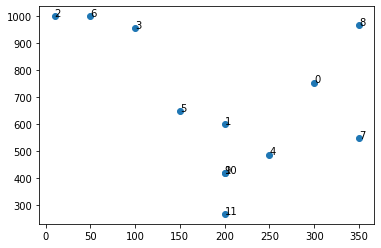

In [6]:

fig, ax = plt.subplots()
plt.scatter(data['epochs_belief_training'], data['cv_speed'])
for i in range(len(data)):
    ax.annotate(i, (data['epochs_belief_training'][i], data['cv_speed'][i]))

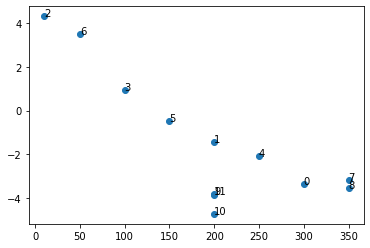

In [10]:
fig, ax = plt.subplots()
plt.scatter(data['epochs_belief_training'], data['min_enc_loss'])
for i in range(len(data)):
    ax.annotate(i, (data['epochs_belief_training'][i], data['min_enc_loss'][i]))